In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
save_path = ('figures/1b2_5')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 30
seed = 10

l_r = 0.001

In [4]:
histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

In [6]:
# Shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [7]:
# Normalize
# X ~ N(0,1)
X_data = ((X_data - np.mean(X_data, axis = 0))/ np.std(X_data, axis =0))
print(X_data[1])

[0.3658602  0.26229304 0.79882862 0.59665321 0.61012728 0.13612981
 0.90911166]


In [8]:
trainY = Y_data[:280]
testY = Y_data[280:]

print(range(len(X_data)))
print(type(X_data))
print(X_data[:5])

range(0, 400)
<class 'numpy.ndarray'>
[[-0.76859003 -0.23259949 -0.07660001  0.0994422  -1.06145431 -0.65302852
   0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.59665321  0.61012728  0.13612981
   0.90911166]
 [-1.20491705 -1.22238456 -0.95202863 -0.39776881  0.05293342 -0.90488756
   0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.89497982 -0.50426044 -1.59330227
  -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -1.39219083 -0.50426044 -2.01306734
  -1.09997489]]


In [9]:
# remove input found from precious experiment
# input number 4, index number 3
X_d=[]
for i in range(len(X_data)):
    x_d = np.delete(X_data[i],np.array(3))
    X_d.append(x_d)

    x_data = np.array(X_d)
    print(x_data)

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.3873

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

 [-1.03038624 -0.8924562  -0.95202863 -1.06145431 -0.70340033 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.2622930

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 [-1.90304027 -1.38734873 -0.95202863 -0.50426044 -1.59330227 -1.09997489]
 [-0.07046681 -0.8924562  -0.07660001 -0.50426044 -2.01306734 -1.09997489]
 [-0.50679383 -1.38734873 -1.82745726 -0.50426044 -0.28363526  0.90911166]
 [ 2.02390285  2.076899    0.79882862  1.724515    1.51295924  0.90911166]
 [ 1.23851423  1.58200646  0.79882862  1.724515    1.37863442  0.90911166]
 [ 1.23851423  1.25207811  1.67425725  0.05293342  1.41221562  0.90911166]
 [-1.03038624  0.09732886  1.67425725 -0.50426044 -0.19968224 -1.09997489]
 [ 0.88945262 -0.56252785  1.67425725  0.05293342  0.40477946  0.90911166]
 [ 0.4531256   0.42725722  0.79882862  1.724515    0.89170694  0.90911166]
 [ 0.3658602   0.26229304 -0.07660001 -0.50426044 -0.09893863  0.90911166]
 [-0.15773222 -1.22238456

 [-1.55397866 -0.8924562  -0.07660001  0.05293342  0.0353862  -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 0.10406399 -0.06763531 -0.07660001  0.05293342 -0.5522849   0.90911166]
 [-1.55397866 -0.8924562  -0.07660001  0.05293342  0.0353862  -1.09997489]
 [ 1.58757584  1.58200646  1.67425725  1.724515    1.61370285  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-1.55397866 -0.8924562  -0.07660001  0.05293342  0.0353862  -1.09997489]
 [ 1.58757584  1.58200646  1.67425725  1.724515    1.61370285  0.90911166]
 [-0.50679383 -0.56252785 -0.07660001  1.16732114 -0.28363526 -1.09997489]]
[[-0.7685900

[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-1.11765165 -1.05742038 -0.95202863 -1.06145431 -1.57651167 -1.09997489]
 [ 1.15124883  1.41704229  0.79882862  1.16732114  1.42900622  0.90911166]
 [ 0.4531256   0.75718558  0.79882862  1.16732114  1.10998477  0.90911166]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [ 1.15124883  1.41704229  0.79882862  1.16732114  1.42900622  0.90911166]
 [ 0.4531256   0.75718558  0.79882862  1.16732114  1.10998477  0.90911166]
 [-0.24499762 -0.23259949 -0.07660001  1.724515    0.50552307 -1.09997489]]
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602 

[[-0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.39756367 -0.07660001 -1.06145431 -0.50191309 -1.09997489]
 [-1.22238456 -0.07660001 -0.50426044  0.10254861  0.90911166]
 [-0.8924562  -0.07660001 -1.06145431  0.13612981 -1.09997489]]
0


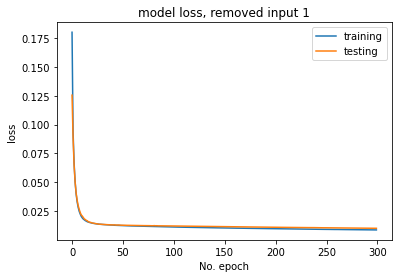

train m.s.e. = 0.009, test m.s.e. = 0.010
[[-0.76859003 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.07660001 -1.06145431 -0.50191309 -1.09997489]
 [-1.46671326 -0.07660001 -0.50426044  0.10254861  0.90911166]
 [-0.33226302 -0.07660001 -1.06145431  0.13612981 -1.09997489]]
1


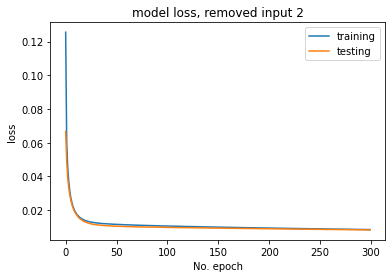

train m.s.e. = 0.008, test m.s.e. = 0.008
[[-0.76859003 -0.23259949 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.39756367 -1.06145431 -0.50191309 -1.09997489]
 [-1.46671326 -1.22238456 -0.50426044  0.10254861  0.90911166]
 [-0.33226302 -0.8924562  -1.06145431  0.13612981 -1.09997489]]
2


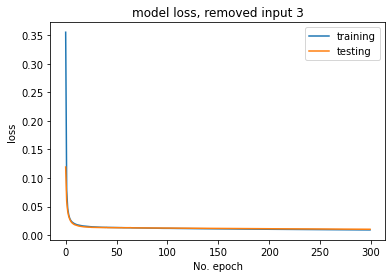

train m.s.e. = 0.009, test m.s.e. = 0.010
[[-0.76859003 -0.23259949 -0.07660001 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.39756367 -0.07660001 -0.50191309 -1.09997489]
 [-1.46671326 -1.22238456 -0.07660001  0.10254861  0.90911166]
 [-0.33226302 -0.8924562  -0.07660001  0.13612981 -1.09997489]]
3


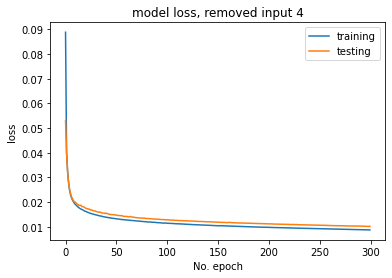

train m.s.e. = 0.009, test m.s.e. = 0.010
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342  0.90911166]
 ...
 [-0.24499762 -0.39756367 -0.07660001 -1.06145431 -1.09997489]
 [-1.46671326 -1.22238456 -0.07660001 -0.50426044  0.90911166]
 [-0.33226302 -0.8924562  -0.07660001 -1.06145431 -1.09997489]]
4


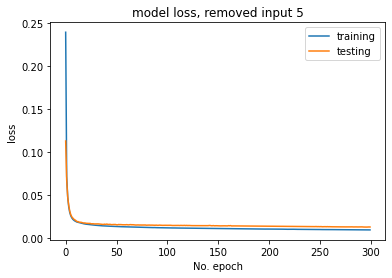

train m.s.e. = 0.009, test m.s.e. = 0.012
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756]
 ...
 [-0.24499762 -0.39756367 -0.07660001 -1.06145431 -0.50191309]
 [-1.46671326 -1.22238456 -0.07660001 -0.50426044  0.10254861]
 [-0.33226302 -0.8924562  -0.07660001 -1.06145431  0.13612981]]
5


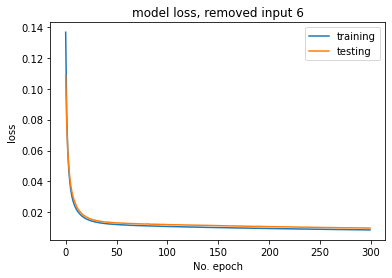

train m.s.e. = 0.009, test m.s.e. = 0.010


In [10]:
# iterate through all the index 
test_mse = 0
train_mse = 0
for d in range(len(x_data[1]-1)):
    x_d = x_data
    X_d = []
    # delete column i 
    for i in range(len(x_data)):
        x_d = np.delete(x_data[i],d)
        X_d.append(x_d)

    # Split data into testing and training with the input reduced
    X_d = np.array(X_d)
    x_train = X_d[:280]
    x_test = X_d[280:]
    
    print(X_d)
    print(d)
    starter_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu'),
        keras.layers.Dense(1, activation = 'linear')])
        
    starter_model.compile(optimizer='sgd',
                          loss=keras.losses.MeanSquaredError(),
                          metrics=['mse'])
        
    histories['starter'] =starter_model.fit(x_train, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 0, 
                                        validation_data=(x_test, testY))
    
    
    plt.plot(histories['starter'].history['loss'], label='training')
    plt.plot(histories['starter'].history['val_loss'], label='testing')
    plt.ylabel('loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="best")
    plt.title('model loss, removed input %d'%(d+1))
    plt.savefig('./%s/model_VS_e_input%d'%(save_path,d+1))
    plt.show()

    print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(histories['starter'].history['loss'][-1], histories['starter'].history['val_loss'][-1]))
